## Обробка та аналіз БМД

**Лабораторна робота №5**  
виконала студентка групи БС-81  
Соловйова Анастасія

1. Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

In [2]:
my_data = pd.DataFrame(
{
    "dataExponential": np.random.exponential(2, 20),
    "dataGumbel": np.random.gumbel(loc=1, scale=12, size = 20),
    "dataGeometric": np.random.geometric(p=0.4, size=20),
    "dataNormal1": np.random.normal(0,5,size = 20),
    "dataNormal2": np.random.normal(0,5,size = 20),
    "dataNormal3": np.random.normal(0,5,size = 20)
})
my_data


,dataExponential,dataGumbel,dataGeometric,dataNormal1,dataNormal2,dataNormal3
0,0.904969,-5.446948,4,-0.577524,-6.770872,0.544301
1,0.206015,12.030833,1,0.145113,-15.147717,-4.570610
2,0.516716,-10.328953,2,6.221537,-8.379658,-1.282941
3,2.231819,11.023062,4,0.612034,3.220412,-4.099245
4,0.505933,28.440107,1,-6.579737,11.542384,-3.170161
5,1.924628,11.235938,3,5.822763,6.559437,-6.289902
6,3.695739,-10.222840,1,2.584138,-0.549353,2.614086
7,2.032290,7.579693,1,6.988157,-3.358090,4.802234
8,1.789598,11.056771,1,1.761236,-2.329719,-7.432094
9,0.670750,-1.855173,4,-8.256891,-0.801871,-7.529474


2. Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних. 

In [3]:
#Відсортуємо данні від мінімального до максимального значення

my_data = my_data.apply(lambda x: x.sort_values().values)
my_data

,dataExponential,dataGumbel,dataGeometric,dataNormal1,dataNormal2,dataNormal3
0,0.206015,-11.153681,1,-9.240802,-15.147717,-7.529474
1,0.348288,-10.328953,1,-8.256891,-10.729290,-7.432094
2,0.401143,-10.222840,1,-6.579737,-8.379658,-6.289902
3,0.470166,-8.503309,1,-4.943666,-6.770872,-5.222775
4,0.505933,-5.446948,1,-3.662253,-3.851574,-4.625033
5,0.516716,-4.600464,1,-2.682095,-3.358090,-4.570610
6,0.670750,-1.855173,1,-1.206047,-2.329719,-4.099245
7,0.904969,-0.524768,1,-1.072703,-1.937730,-3.170161
8,1.190158,0.014902,1,-0.577524,-1.897798,-1.282941
9,1.277292,4.923338,1,0.145113,-1.601534,0.423889


In [4]:
#S²
arr_size = my_data.shape[0] 

def squared_S(array, value):
    return sum([(array[i]-value)**2 
                for i in range(arr_size)]) 

values = {key: np.mean(my_data[key]) 
          for key in my_data}
sq_S = {key: squared_S(my_data[key], values[key])
                 for key in my_data}

In [5]:
#b
a=[0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140]

def b_value(array):
    return sum([a[i]*(array[(arr_size-1)-i]-array[i])
                for i in range(arr_size//2)])

b = {key: b_value(my_data[key]) for key in my_data}

In [6]:
#W
def calculate_W(b, sq_S):
    return b**2/sq_S

W = {key: calculate_W(b[key], sq_S[key]) for key in my_data}

W_theory = sts.shapiro(my_data['dataExponential'])
W, W_theory

({'dataExponential': 0.8817684901592427,
  'dataGumbel': 0.9138870889800084,
  'dataGeometric': 0.7665701780068725,
  'dataNormal1': 0.9480744125653245,
  'dataNormal2': 0.982301327687549,
  'dataNormal3': 0.8867396464876605},
 (0.8816759586334229, 0.018966345116496086))

3.Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution.

In [7]:
table=pd.DataFrame(columns=["Variable","Statistics","Distribution"]) 
table

,Variable,Statistics,Distribution


4. Занести в стовпчик Variable назви змінних.


In [8]:
table['Variable']=my_data.keys()
table

,Variable,Statistics,Distribution
0,dataExponential,NaN,NaN
1,dataGumbel,NaN,NaN
2,dataGeometric,NaN,NaN
3,dataNormal1,NaN,NaN
4,dataNormal2,NaN,NaN
5,dataNormal3,NaN,NaN


5. Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".

In [10]:
table["Distribution"] = [('normal ' if 'normal' in key else 'non-normal ')+
                          str(W[key])
                          for key in table["Variable"]]
table

,Variable,Statistics,Distribution
0,dataExponential,NaN,non-normal 0.8817684901592427
1,dataGumbel,NaN,non-normal 0.9138870889800084
2,dataGeometric,NaN,non-normal 0.7665701780068725
3,dataNormal1,NaN,non-normal 0.9480744125653245
4,dataNormal2,NaN,non-normal 0.982301327687549
5,dataNormal3,NaN,non-normal 0.8867396464876605


6. Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].

In [12]:
for i in range (table.shape[0]):
    var = table["Variable"][i]
    if 'normal' in var:
        table["Statistics"][i] = f'{my_data[var].mean()} [{my_data[var].std()}]'
table

,Variable,Statistics,Distribution
0,dataExponential,NaN,non-normal 0.8817684901592427
1,dataGumbel,NaN,non-normal 0.9138870889800084
2,dataGeometric,NaN,non-normal 0.7665701780068725
3,dataNormal1,NaN,non-normal 0.9480744125653245
4,dataNormal2,NaN,non-normal 0.982301327687549
5,dataNormal3,NaN,non-normal 0.8867396464876605


7. Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].

In [13]:
for i in range (table.shape[0]):
    var = table["Variable"][i]
    if 'normal' not in var:
        table["Statistics"][i] = f'{my_data[var].median()} [{my_data[var].quantile(0.25)}; {my_data[var].quantile(0.75)}]'
table

,Variable,Statistics,Distribution
0,dataExponential,1.5334447680097494 [0.5140203112933586; 2.0821...,non-normal 0.8817684901592427
1,dataGumbel,5.747665408533468 [-4.812085461916866; 11.0314...,non-normal 0.9138870889800084
2,dataGeometric,1.0 [1.0; 3.25],non-normal 0.7665701780068725
3,dataNormal1,0.37857319326284133 [-2.9271347164343653; 4.49...,non-normal 0.9480744125653245
4,dataNormal2,-1.201702640672254 [-3.481460942724467; 3.8348...,non-normal 0.982301327687549
5,dataNormal3,0.484094802656733 [-4.584215777089507; 2.26501...,non-normal 0.8867396464876605


8. Зберегти таблицю в пдф форматі

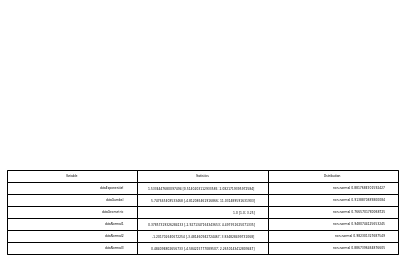

In [16]:
from matplotlib.backends.backend_pdf import PdfPages 
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(7,3))
ax.axis('off')
save_table=ax.table(cellText=table.values, colLabels=table.columns)

save=PdfPages("table.pdf") 
save.savefig(fig) 
save.close()